In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import textstat.textstat
from Utility.plot_utility import plot_mean_bar_graph
from Utility.plot_utility_anova import plot_mean_bar_graph_3candidates

In [2]:
def read_data(file_path):
    full_path = os.path.join('..', 'Cleaned Data', file_path)

    return pd.read_json(full_path, lines=True)

In [3]:
df1 = read_data('one/part-00000-9076dc6d-fa59-4c36-a0cf-8808e309da7b-c000.json.gz')
df2 = read_data('two/part-00000-c7cf2076-eae1-4d0c-bce1-e7b0c43a3bf1-c000.json.gz')
df3 = read_data('three/part-00000-662e59e6-5ee7-48da-a85f-1bcf09724f97-c000.json.gz')
df4 = read_data('four/part-00000-3060ac52-6be0-4d42-a322-3e4a7954a4f4-c000.json.gz')
df5 = read_data('five/part-00000-9c42996a-80d4-4a96-b59b-228f5e241a65-c000.json.gz')
df6 = read_data('six/part-00000-5da94b81-55c0-42e7-b3dc-5a51a14e8589-c000.json.gz')
df7 = read_data('seven/part-00000-eb573e13-d85e-400c-b3db-ffa9bd2d5543-c000.json.gz')
df8 = read_data('eight/part-00000-61526e86-ba2d-4df5-a9d1-d043ca875b62-c000.json.gz')
df9 = read_data('nine/part-00000-dc7c0356-fae4-47b8-a93a-f9b401cf70f0-c000.json.gz')
df10 = read_data('ten/part-00000-f3ae3925-50c4-469e-8304-6007e9b4cdab-c000.json.gz')
df11 = read_data('eleven/part-00000-2aa1781a-723e-49c4-a488-47ca50409657-c000.json.gz')
df12 = read_data('twelve/part-00000-7ff282ff-fa5e-494c-ab5c-59f07d2a2f0d-c000.json.gz')

frames = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12]
df = pd.concat(frames, ignore_index=True)

df;

In [4]:
# Filter out unnecessary columns
columns = [
    'subreddit',
    'score',
    'selftext',
]

df = df[columns]

df = df.sort_values('score')

#341418 rows
df;

In [5]:
# Filter out selftext with no words
df = df[df['selftext'].apply(lambda x: len(str(x).split()) >= 1)]

#2814 rows
df;

In [6]:
# Calculate post length

df['post_length'] = df['selftext'].str.len()

df = df.sort_values('post_length')
                    
df;

In [7]:
'''
Mann-Whitney U Test
* assumes samples are independent and identically distributed
* assumes values are ordinal

Dependent variable: num_comments
    * assume that the num_comments change depending on the score
Independent variable: scores from high/low num_comments
'''

'\nMann-Whitney U Test\n* assumes samples are independent and identically distributed\n* assumes values are ordinal\n\nDependent variable: num_comments\n    * assume that the num_comments change depending on the score\nIndependent variable: scores from high/low num_comments\n'

In [8]:
# Separate data by high/low post_length

median_post_length = df['post_length'].median()

high_post_length_score = df[df['post_length'] > median_post_length]['score']
low_post_length_score = df[df['post_length'] <= median_post_length]['score']

high_post_length_score, low_post_length_score

(37567      2
 122528     4
 22866      3
 168293     1
 145760    26
           ..
 153643     1
 208034     1
 65571      4
 267489     2
 168620     5
 Name: score, Length: 149808, dtype: int64,
 43246      3
 187672     1
 95094     11
 113821     6
 136428     1
           ..
 19320      0
 57665      1
 227742     0
 218602     4
 218447     2
 Name: score, Length: 150156, dtype: int64)

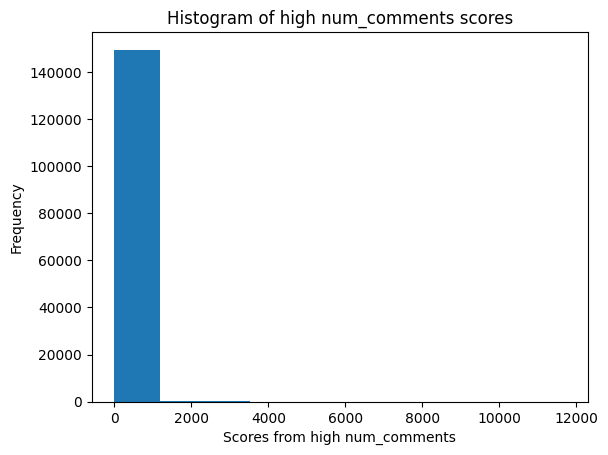

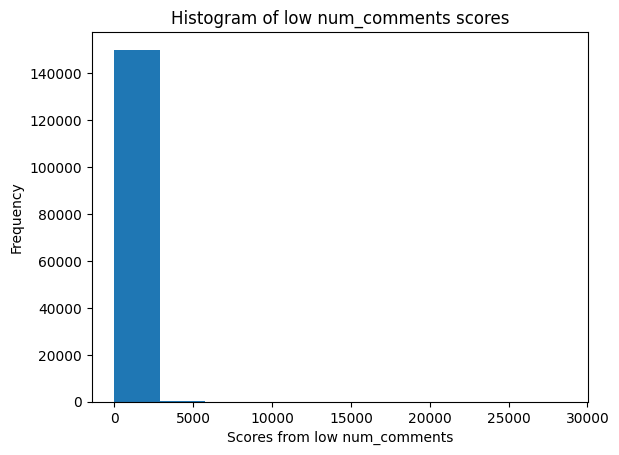

In [9]:
# Test if high_score_comments and low_score_comments have similar distribution

plt.hist(high_post_length_score, bins=10)
plt.xlabel('Scores from high num_comments')
plt.ylabel('Frequency')
plt.title('Histogram of high num_comments scores')
plt.show()

plt.hist(low_post_length_score, bins=10)
plt.xlabel('Scores from low num_comments')
plt.ylabel('Frequency')
plt.title('Histogram of low num_comments scores')
plt.show()

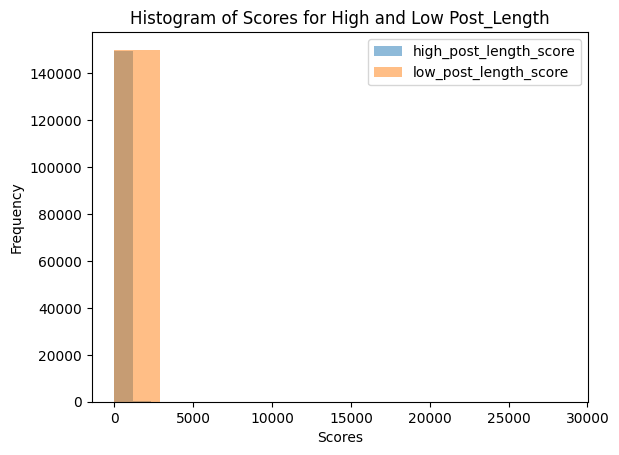

In [10]:
# Plot the histograms for high_score_comments and low_score_comments on the same plot

plt.hist(high_post_length_score, bins=10, alpha=0.5, label='high_post_length_score')
plt.hist(low_post_length_score, bins=10, alpha=0.5, label='low_post_length_score')

plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.title('Histogram of Scores for High and Low Post_Length')
plt.legend(loc='upper right')

plt.show()


In [11]:
'''
Note to self:

Since both high_score_comments and low_score_comments have similar distribution
Proceed with Mann-Whitney U Test
'''

'\nNote to self:\n\nSince both high_score_comments and low_score_comments have similar distribution\nProceed with Mann-Whitney U Test\n'

In [12]:
# Perform Mann-Whitney U Test
# p-value < 0.05 indicates distributions are not equal between two sets of data

statistic, p_value = stats.mannwhitneyu(high_post_length_score, low_post_length_score)

def interpret_mannwhitneyu(p_value, alpha=0.05):
    if p_value < alpha:
        return "The distributions of the two groups are significantly different:\n the length of each post may have an impact on the score of a post"
    else:
        return "The distributions of the two groups are not significantly different:\n the length of each post does not have a significant impact on the score of a post"


print(f'Mann-Whitney U test statistic: {statistic}, p-value: {p_value}')
print(interpret_mannwhitneyu(p_value))

Mann-Whitney U test statistic: 13177554453.0, p-value: 0.0
The distributions of the two groups are significantly different:
 the length of each post may have an impact on the score of a post


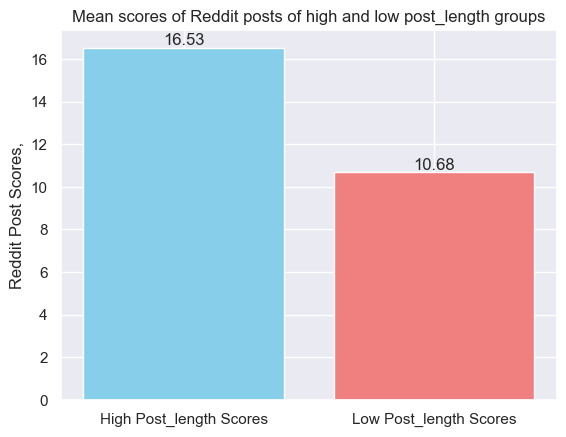

In [13]:
# Plot mean scores of high/low post_length
plot_mean_bar_graph(high_post_length_score,
                    low_post_length_score, 
                    'Mean scores of Reddit posts of high and low post_length groups', 
                    ['High Post_length Scores', 'Low Post_length Scores'], 
                    'Reddit Post Scores,',
                    '../Graphs/post_length.png')

In [14]:
# Perform a normality test on the post_length

statistic, p_value = stats.normaltest(df['post_length'])

print(f'p_value: {p_value}')

# Print the normality test result
if p_value < 0.05:
    print("The column post_length is not normally distributed (p-value < 0.05).")
else:
    print("The column post_length is approximately normally distributed (p-value >= 0.05).")

p_value: 0.0
The column post_length is not normally distributed (p-value < 0.05).


Text(0.5, 1.0, 'Histogram of post_length')

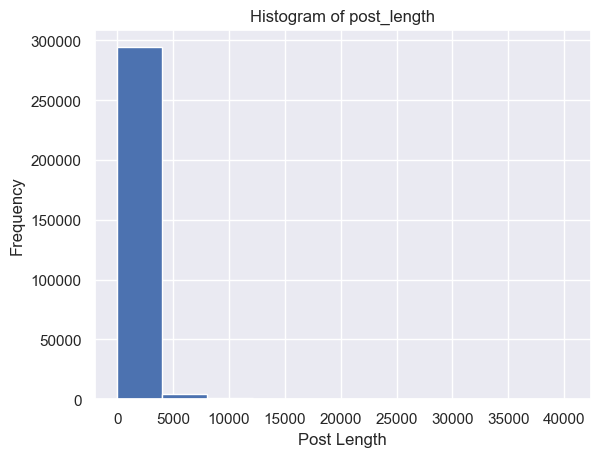

In [15]:
# Rough eye test of post_length distribution

plt.hist(df['post_length'], bins=10)
plt.xlabel('Post Length')
plt.ylabel('Frequency')
plt.title('Histogram of post_length')

In [16]:
'''
Note to self:

Since post_length is left skewed:
- x → $e^x$: useful if left-skewed
- x → $x^2$: useful if left-skewed
'''

'\nNote to self:\n\nSince post_length is left skewed:\n- x → $e^x$: useful if left-skewed\n- x → $x^2$: useful if left-skewed\n'

In [17]:
# Transform post_length

'''
.exp results in inf post_length
.square results in left-skewed histogram
.log results in somewhat normal histogram
.sqrt results in semi left-skewed histogram
'''
#df['post_length_exp'] = np.exp(df['post_length']) 
df['post_length_square'] = np.square(df['post_length'])
df['post_length_log'] = np.log(df['post_length'] + 1) 
df['post_length_sqrt'] = np.sqrt(df['post_length']) 

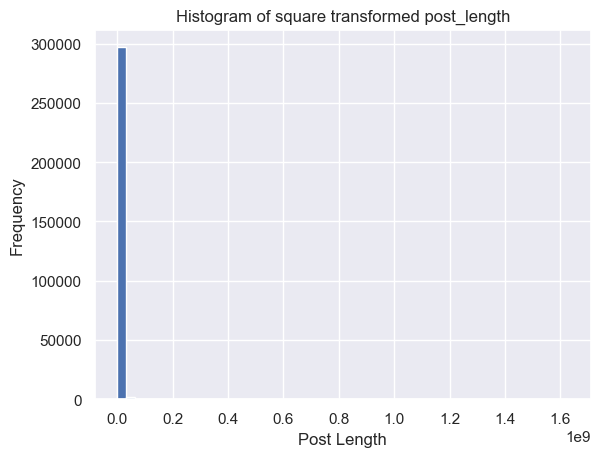

In [18]:
plt.hist(df['post_length_square'], bins=50)
plt.xlabel('Post Length')
plt.ylabel('Frequency')
plt.title('Histogram of square transformed post_length')
plt.show()

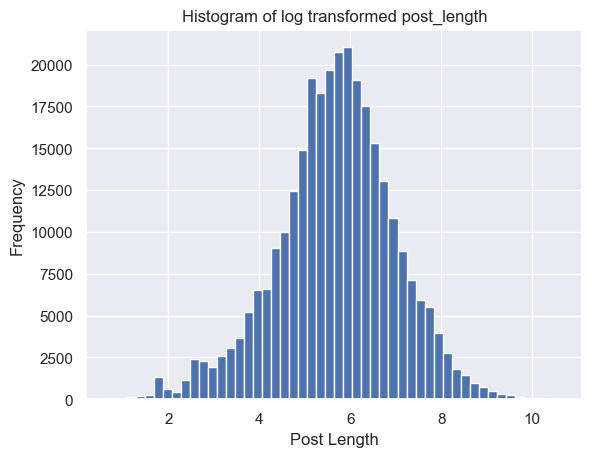

In [19]:
plt.hist(df['post_length_log'], bins=50)
plt.xlabel('Post Length')
plt.ylabel('Frequency')
plt.title('Histogram of log transformed post_length')
plt.show()

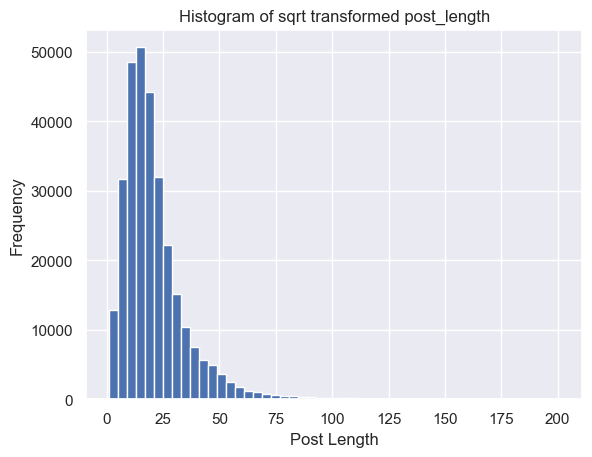

In [20]:
plt.hist(df['post_length_sqrt'], bins=50)
plt.xlabel('Post Length')
plt.ylabel('Frequency')
plt.title('Histogram of sqrt transformed post_length')
plt.show()

In [21]:
'''
Note to self:

post_length is normal enough for the eye test
Verify with normal test again
'''

# Perform a normality test on post_length_log

statistic, p_value = stats.normaltest(df['post_length_log'])

print(f'p_value: {p_value}')

# Print the normality test result
if p_value < 0.05:
    print("The column post_length_log is not normally distributed (p-value < 0.05).")
else:
    print("The column post_length_log is approximately normally distributed (p-value >= 0.05).")


p_value: 0.0
The column post_length_log is not normally distributed (p-value < 0.05).


In [22]:
# Separate scores by low, medium, high subreddit_popularity

df['post_length_category'] = pd.qcut(df['post_length_log'], 3, labels=['low', 'medium', 'high'])

low_post_length = df[df['post_length_category'] == 'low']['score']
medium_post_length = df[df['post_length_category'] == 'medium']['score']
high_post_length = df[df['post_length_category'] == 'high']['score']

low_post_length, medium_post_length, high_post_length;

In [23]:
# Perform Ttest on the original subreddit_popularity

statistic, p_value = stats.ttest_ind(high_post_length_score, low_post_length_score)

print(f'Ttest statistic: {statistic}, p-value: {p_value}')

def interpret_ttest(p_value, alpha=0.05):
    if p_value < alpha:
        return "The distributions of the two groups are significantly different:\n the length of posts may have an impact on the score of a post"
    else:
        return "The distributions of the two groups are not significantly different:\n the length of posts does not have a significant impact on the score of a post"

print(interpret_ttest(p_value))

Ttest statistic: 12.279795320299298, p-value: 1.185459350285162e-34
The distributions of the two groups are significantly different:
 the length of posts may have an impact on the score of a post


In [24]:
# Perform one-way ANOVA

statistic, p_value = stats.f_oneway(low_post_length, medium_post_length, high_post_length)

print(f'ANOVA one-way test statistic: {statistic}, p-value: {p_value}')

def interpret_anova(p_value, alpha=0.05):
    if p_value < alpha:
        return "The distributions of the three groups are significantly different:\n the length of posts may have an impact on the score of a post"
    else:
        return "The distributions of the three groups are not significantly different:\n the length of posts does not have a significant impact on the score of a post"

print(interpret_anova(p_value))

ANOVA one-way test statistic: 153.2543366650572, p-value: 2.995499767708974e-67
The distributions of the three groups are significantly different:
 the length of posts may have an impact on the score of a post


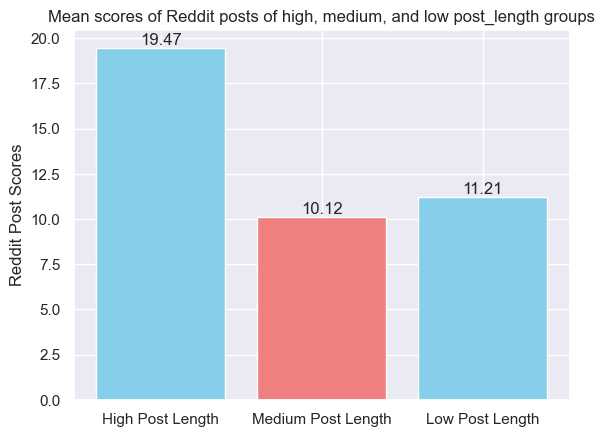

In [25]:
# Plot mean scores of high/medium/low post_length
plot_mean_bar_graph_3candidates(high_post_length,
                    medium_post_length, 
                    low_post_length,
                    'Mean scores of Reddit posts of high, medium, and low post_length groups', 
                    ['High Post Length', 'Medium Post Length', 'Low Post Length'], 
                    'Reddit Post Scores', 
                    '../Graphs/post_length_anova.png')